In [1]:
#决策树

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter
import math
from math import log

import pprint

In [2]:
def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ] #二维矩阵
    labels = [u'年龄',u'有工作',u'有自己的房子',u'信贷情况',u'类别']
    return datasets,labels
    

In [5]:
datasets,labels = create_data()
data = pd.DataFrame(datasets,columns = labels)
data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [24]:
datasets[5][2]

'否'

In [27]:
#熵
def shang(datasets):
    length = len(datasets)
    label_count = {}
    for i in range(length):
        label = datasets[i][-1] #最后一列
        if label not in label_count:
            label_count[label] = 0 #这就说明这个label是第一次出现的
        label_count[label] += 1
    shang = -sum([p/length*log(p/length,2) for p in  label_count.values()]) #values是按照类别分别计数,能统计出各个标签的数量情况
    return shang
#条件熵,是要考虑特征的
def tjshang(datasets,a=0):#注意要写axis = 0,是为了后面遍历表中的每个值,一列是怎么算,其他列也按照相同的方法算
    length = len(datasets)
    feature_sets = {}
    for i in range(length):
        feature =  datasets[i][a] #每个值都是特征的不同取值
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(datasets[i]) #得到每个特征不同取值的集合
    tjshang = sum([len(p)/length*shang(p) for p in feature_sets.values()]) 
    return tjshang
#信息增益
def xxzy(shang,tjshang):
    return shang - tjshang
#选信息增益最大的特征
def max_feature(datasets):
    count = len(datasets[0]) - 1 #对每一列作相同的算法
    max_feature = []
    for i in range(count):
        i_xxzy = xxzy(shang(datasets),tjshang(datasets,a=i))
        max_feature.append((i, i_xxzy))#两个括号
        print('特征({})的信息增益为:{:.3f}'.format(labels[i],i_xxzy)) #format后面的值在前面必须有({})
    max_ = max(max_feature,key = lambda x:x[-1])#返回max_feature最后一列的最大值的索引
    return '特征({})的信息增益最大,选为根节点'.format((labels[max_[0]]))   #max_[0] ,为什么要用0      

In [28]:
max_feature(np.array(datasets))

特征(年龄)的信息增益为:0.083
特征(有工作)的信息增益为:0.324
特征(有自己的房子)的信息增益为:0.420
特征(信贷情况)的信息增益为:0.363


'特征(有自己的房子)的信息增益最大,选为根节点'

In [ ]:
#ID3树的实现
class Node:
    def __init__(self,root = True,label = None,feature_name = None,feature = None):
        self.root = root
        self.label = label
        self.feature_name = feature_name
        self.feature = feature
        self.tree = {}
        self.result = {'label:'self.label, 'feature': self.feature, 'tree': self.tree}
   
    def __repr__(self):
        return '{}'.format(self.result)
    
    def add_node(self,val,node):#val是啥
        self.tree[val] = node
        
    def predict(self,features):
        if self.root = True:
            return self.label
        return self.tree[features[self.feature]].predict(features)

class DTree:   
    def __init__(self,epsilon = 0.1):
        self.epsilon = epsilon #阈值
        self._tree = {}
        
    @staticmethod
    #熵
    def shang(datasets):
    length = len(datasets)
    label_count = {}
    for i in range(length):
        label = datasets[i][-1] #最后一列
        if label not in label_count:
            label_count[label] = 0 #这就说明这个label是第一次出现的
        label_count[label] += 1
    shang = -sum([p/length*log(p/length,2) for p in  label_count.values()]) #values是按照类别分别计数,能统计出各个标签的数量情况
    return shang
#条件熵,是要考虑特征的
    def tjshang(datasets,a=0):#注意要写axis = 0,是为了后面遍历表中的每个值,一列是怎么算,其他列也按照相同的方法算
    length = len(datasets)
    feature_sets = {}
    for i in range(length):
        feature =  datasets[i][a] #每个值都是特征的不同取值
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(datasets[i]) #得到每个特征不同取值的集合
    tjshang = sum([len(p)/length*shang(p) for p in feature_sets.values()]) 
    return tjshang
#信息增益
    def xxzy(shang,tjshang):
    return shang - tjshang
#选信息增益最大的特征
    def max_feature(datasets):
    count = len(datasets[0]) - 1 #对每一列作相同的算法
    max_feature = []
    for i in range(count):
        i_xxzy = xxzy(shang(datasets),tjshang(datasets,a=i))
        max_feature.append((i, i_xxzy))#两个括号
        #print('特征({})的信息增益为:{:.3f}'.format(labels[i],i_xxzy)) #format后面的值在前面必须有({})
    max_ = max(max_feature,key = lambda x:x[-1])#返回max_feature最后一列的最大值的索引
    #return '特征({})的信息增益最大,选为根节点'.format((labels[max_[0]]))   #max_[0] ,为什么要用0      
    return max_
#ID3树的实现
    def train(self,train_data):
    _, y_train, features = train_data.iloc[:, :-1], train_data.iloc[:, -1], train_data.columns[:-1] 
    if len(y_train.value_counts()) == 1:
        return Node(root = True,
                   label=y_train.iloc[0])
    
    if
        

In [ ]:
#---------------------------------------------------

In [29]:
#感知机
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

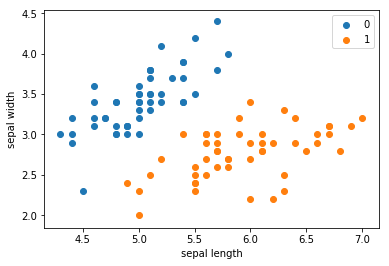

In [33]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label = '0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [59]:
data = np.array(df.iloc[:100,[0,1,-1]])
x,y = data[:,:-1],data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [60]:
#感知机
class Model():
    def __init__(self):
        self.w = np.ones(len(data[0])-1,dtype = np.float32) #?不知道有什么作用
        self.b = 0
        self.l_rate = 0.1 #步长
    
    def sign(self,x,w,b):
        y = np.dot(x,w) + b #是矩阵相乘不是乘法
        return y
    
    def fit(self,x_train,y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0 #要放在里面作为判断的条件
            for d in range(len(x_train)):
                x = x_train[d]#注意要遍历到每个点
                y = y_train[d]
                if y * self.sign(x,self.w,self.b) <= 0: #括号里面的必须加self
                    self.w = self.w + self.l_rate*np.dot(y,x)
                    self.b = self.b + self.l_rate*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return  'there is not wrong dot'
     
    def score(self):
        pass

    

In [61]:
perceptron = Model()
perceptron.fit(x,y)

'there is not wrong dot'

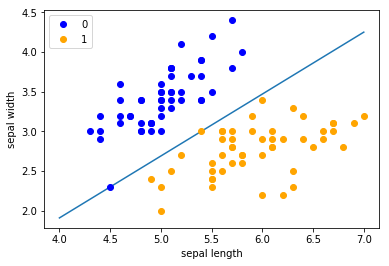

In [64]:
x_points = np.linspace(4,7,10)
y = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1] #?y是纵坐标
plt.plot(x_points,y)
plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [ ]:
#-----------------------------------------

In [76]:
#函数拟合
import numpy as np
import scipy as sp
from scipy.optimize import leastsq #模块提供了许多数值优化算法,leastsq()对数据进行最小二乘拟合计算。 leastsq()的用法很简单，只需要将计箅误差的函数和待确定参数的初始值传递给它即可。
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)


def res_func(p,x,y):
    res = fit_func(p,x) - y
    return res

In [123]:
x = np.linspace(0,1,10)#10个噪声点
x_points = np.linspace(0,1,1000)#是要画图的点
y = real_func(x)
y_ = [np.random.normal(0,0.1)+ y1 for y1 in y]
def fitting(M=0):
    p_init = np.random.rand(M+1)
    lsq = leastsq(res_func,p_init,args = (x,y))#先写计算误差的函数,先得到最小二乘的多项式系数
    #要是没有args = (),就会报错,res_func（）缺少1个必需的位置参数：'y'
    print('Fitting Parameters:',lsq[0])
    
    plt.plot(x_points, real_func(x_points), label='real') #sin曲线
    plt.plot(x_points, fit_func(lsq[0], x_points), label='fitted curve')#拟合的曲线,这儿写lsq[0]类似上面写max[0]    
    plt.plot(x, y_, 'bo', label='noise')#位于sin曲线周围的噪声点
    plt.legend()
    return lsq

Fitting Parameters: [7.08479941e-10]


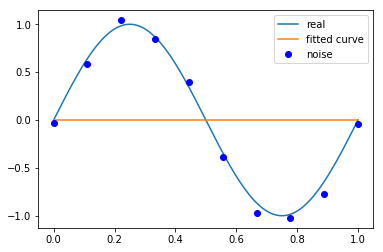

In [124]:
lsq_0 = fitting(M=0)

Fitting Parameters: [ 21.07651917 -31.61477876  10.64664001  -0.05419021]


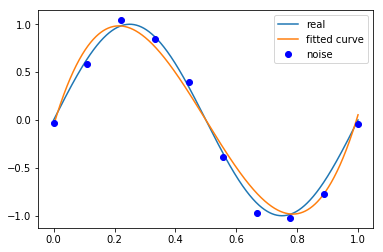

In [125]:
lsq_3 = fitting(M=3)

Fitting Parameters: [-3.50069823e+01  1.57531420e+02 -2.39484331e+02  1.03048530e+02
  3.95696989e+01  1.10277430e+01 -4.31219765e+01  1.58539686e-01
  6.27735815e+00  4.99942867e-24]


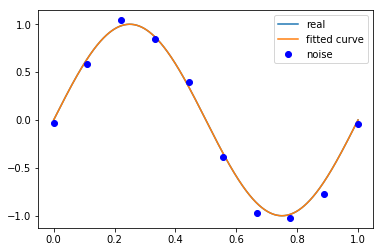

In [126]:
lsq_9 = fitting(M=9)

In [127]:
#正则化
regularization = 0.0001 #lambda

def  residuals_func_regularization(p, x, y):
    ret = fit_func(p,x) - y
    ret = np.append(ret,np.sqrt(0.5*regularization*np.square(p)))
    return ret

In [128]:
p = np.random.rand(9+1) #多项式参数,多了一个
lsq_regularization = leastsq(residuals_func_regularization, p, args=(x, y))

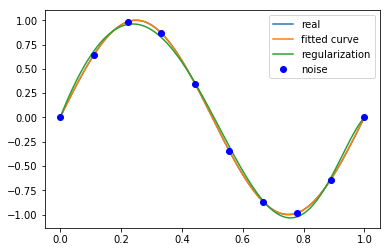

In [129]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

In [ ]:
#==================================

In [1]:
#k近邻法knn
import math
from itertools import combinations

In [14]:
#x,y表示点的坐标
def dis(x,y,p = 2): 
    if len(x)==len(y) and len(x)>1:
        sum = 0 
        for i in range(len(x)):
            sum += math.pow(abs(x[i]-y[i]),p)
        return math.pow(sum,1/p)
    else:
        return 0
            

In [10]:
# 课本例3.1
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]
len(x1)

2

In [17]:
for i in range(1,6):#求的是x1在不同的距离度量时,离哪个点更近
    r = {'1-{}'.format(c):dis(x1,c,p=i) for c in [x2,x3]} #这是一个字典,format()表示键,dis表示值
    print(min(zip(r.values(),r.keys())))

(4.0, '1-[5, 1]')
(4.0, '1-[5, 1]')
(3.7797631496846193, '1-[4, 4]')
(3.5676213450081633, '1-[4, 4]')
(3.446095064991105, '1-[4, 4]')


In [ ]:
#python实现，遍历所有数据点，找出n个距离最近的点的分类情况，少数服从多数

In [24]:
#统计数量
from collections import Counter 
words = 'this is for the test of the counter class'.split()
cnt = Counter()
for word in words:
    cnt[word] += 1
cnt


Counter({'this': 1,
         'is': 1,
         'for': 1,
         'the': 2,
         'test': 1,
         'of': 1,
         'counter': 1,
         'class': 1})

In [33]:
words = 'this is for the test of the counter class'.split()
words[1]
len(words)

9

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter#collections模块中的的Counter类是一个容器类型，可以用来对数据出现的次数进行计数统计

In [43]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [44]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


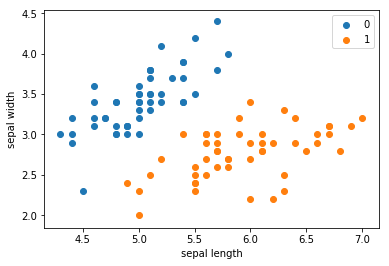

In [45]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [47]:
data = np.array(df.iloc[:100,[0,1,-1]])
x,y = data[:,:-1],data[:,-1]
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
class KNN:
    def __init__(self, x_train, y_train, n_neighbors=3, p=2):
        self.n = n_neighbors
        self.p = p
        self.x_train = x_train
        self.y_train = y_train
     
    def predict(self,x):
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(x-self.x_train,ord = self.p)#求范数
            knn_list.append((dist,self.y_train[i]))